In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection and preprocessing

In [2]:
cardata = pd.read_csv('/content/sample_data/car data.csv')
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
cardata.shape

(301, 9)

In [3]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
## Getting the categorical data
categorical_features = []

for cols in cardata.columns:
  if cardata[cols].dtypes == 'object':
    categorical_features.append(cols)

categorical_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [22]:
for cols in categorical_features[1:]:
  print(cardata[cols].value_counts())
  print("---------------------------")

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
---------------------------


## Encoding the categorical feature values

In [26]:
## For "Fuel Type" column

cardata.replace(
    {'Fuel_Type' : {'Petrol': 0, 'Diesel': 1, 'CNG' : 2}},
    inplace = True
)

## For "Seller_Type" column

cardata.replace(
    {'Seller_Type' : {'Dealer': 0, 'Individual': 1}},
    inplace = True
)

## For "Transmission" column

cardata.replace(
    {'Transmission' : {'Manual': 0, 'Automatic': 1}},
    inplace = True
)

In [27]:
cardata.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [28]:
cardata.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

## Splitting data in train and test split

In [42]:
cardata.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0


In [44]:
x = cardata.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = cardata['Selling_Price']

In [45]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [46]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 7)
(61, 7)
(240,)
(61,)


## Model Building : LinearRegression

In [53]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [55]:
train_data_predict = reg.predict(x_train)

In [59]:
## R squared error
error = metrics.r2_score(y_train, train_data_predict)
print("R Squared Error : ", error)

R Squared Error :  0.8782377739155227


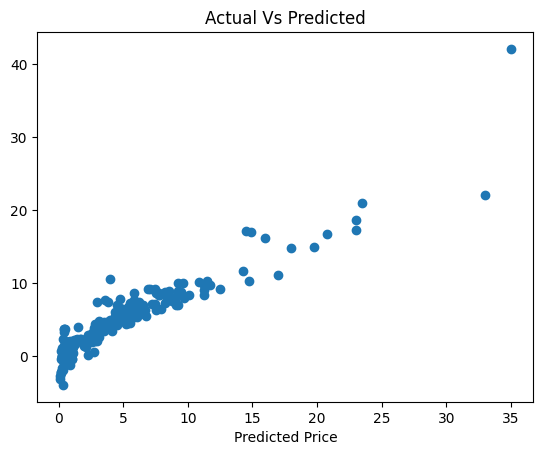

In [62]:
## Plotting the actual prices and predicted prices
plt.scatter(y_train, train_data_predict)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()

In [63]:
test_data_predict = reg.predict(x_test)

In [66]:
error_test = metrics.r2_score(y_test, test_data_predict)
print("R Squared Error : ", error_test)

R Squared Error :  0.8395017354851568


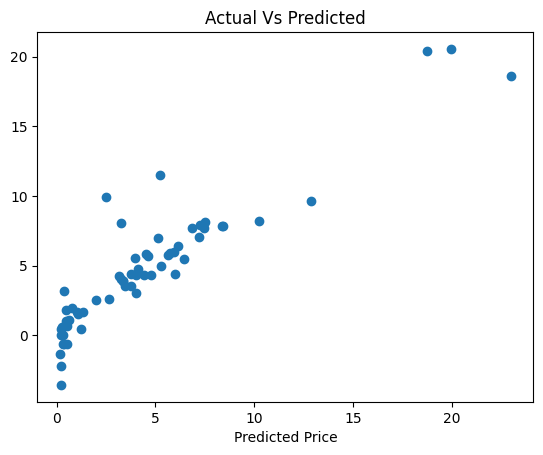

In [68]:
## Plotting the actual prices and predicted prices
plt.scatter(y_test, test_data_predict)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()

## Lasso Regression

In [69]:
Lasso_reg = Lasso()
Lasso_reg.fit(x_train, y_train)

Lasso()

In [70]:
Lasso_reg.fit(x_train, y_train)

Lasso()

In [72]:
lasso_train_pred = Lasso_reg.predict(x_train)
error_score_lasso = metrics.r2_score(y_train, lasso_train_pred)
print("R Squared Error : ", error_score_lasso)

R Squared Error :  0.8416309679582044


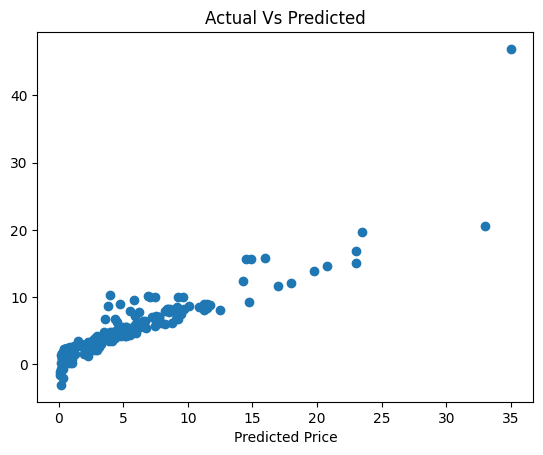

In [74]:
## Plotting the actual prices and predicted prices
plt.scatter(y_train, lasso_train_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()

In [78]:
lasso_test_predict = reg.predict(x_test)
lasso_error_test = metrics.r2_score(y_test, lasso_test_predict)
print("R Squared Error : ", lasso_error_test)

R Squared Error :  0.8395017354851568


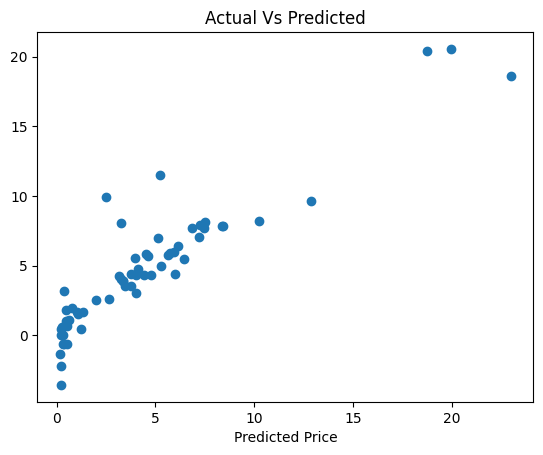

In [79]:
## Plotting the actual prices and predicted prices
plt.scatter(y_test, lasso_test_predict)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()